<a href="https://colab.research.google.com/github/hasmitha005/OIBSIP/blob/main/Project_1_Proposal_Level_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 1 - Import & load (use your exact upload style)
from google.colab import files
uploaded = files.upload()     # choose your file (e.g., Housing.csv)

import pandas as pd
df = pd.read_csv('Housing.csv')    # make sure file name matches exactly
print("Loaded DataFrame shape:", df.shape)
display(df.head())


Saving Housing.csv to Housing.csv
Loaded DataFrame shape: (545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Cell 2 - Basic inspection
print("Columns:", df.columns.tolist())
print("\nData types:")
display(df.dtypes)
print("\nMissing values (top 20):")
display(df.isnull().sum().sort_values(ascending=False).head(20))
print("\nBasic statistics for numeric columns:")
display(df.describe().transpose())


Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

Data types:


,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object



Missing values (top 20):


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0



Basic statistics for numeric columns:


,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [ ]:
# Cell 3 - detect likely target column (price) safely
target_candidates = ['price','median_house_value','saleprice','price_usd','house_price','median_price']
found_targets = [c for c in df.columns if c.lower() in target_candidates]

if len(found_targets) >= 1:
    TARGET = found_targets[0]
else:
    # fallback: ask user via printed list (you can edit TARGET manually)
    print("No obvious target column found automatically.")
    print("Columns available:", df.columns.tolist())
    # common fallback: try the last column
    TARGET = df.columns[-1]
    print("Using fallback TARGET =", TARGET, "(edit if incorrect)")

print("Using TARGET column:", TARGET)
display(df[TARGET].describe())


Using TARGET column: price


,price
count,5.450000e+02
mean,4.766729e+06
std,1.870440e+06
min,1.750000e+06
25%,3.430000e+06
50%,4.340000e+06
75%,5.740000e+06
max,1.330000e+07


In [ ]:
# Cell 4 - cleaning
import numpy as np

# 1) Drop exact duplicates
dupes = df.duplicated().sum()
print("Duplicate rows:", dupes)
if dupes:
    df = df.drop_duplicates()
    print("Dropped duplicates. New shape:", df.shape)

# 2) List numeric and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print("Numeric cols:", num_cols)
print("Categorical cols:", cat_cols)

# 3) Handle missing values (simple, pragmatic):
# For numeric: fill with median
for c in num_cols:
    if df[c].isnull().any():
        med = df[c].median()
        df[c] = df[c].fillna(med)
        print(f"Filled numeric {c} missing with median = {med}")

# For categorical: fill with mode
for c in cat_cols:
    if df[c].isnull().any():
        mode = df[c].mode().iloc[0]
        df[c] = df[c].fillna(mode)
        print(f"Filled categorical {c} missing with mode = {mode}")

print("After filling missing values, missing sum (should be 0 or low):")
display(df.isnull().sum().sort_values(ascending=False).head(20))


Duplicate rows: 0
Numeric cols: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical cols: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
After filling missing values, missing sum (should be 0 or low):


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


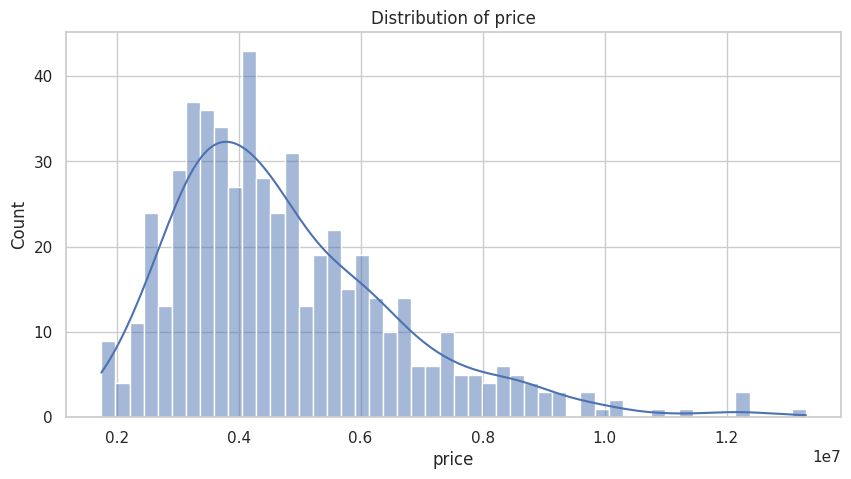

Top correlations with target:


,price
price,1.000000
area,0.535997
bathrooms,0.517545
stories,0.420712
parking,0.384394
bedrooms,0.366494


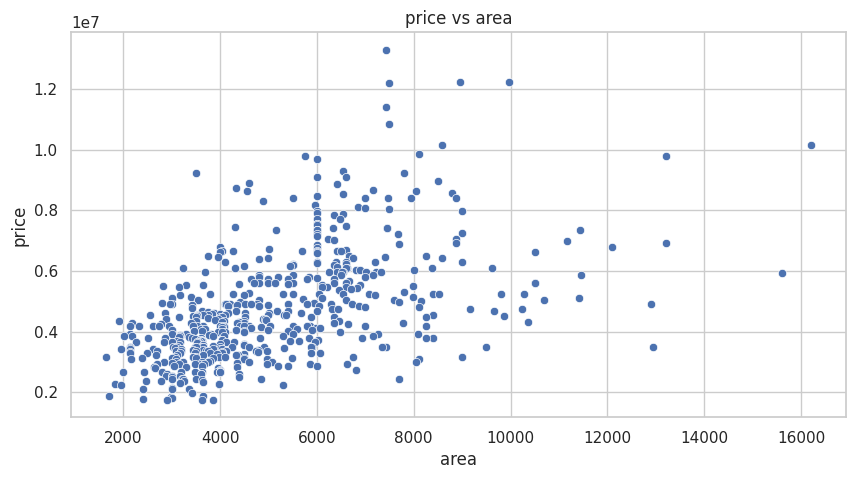

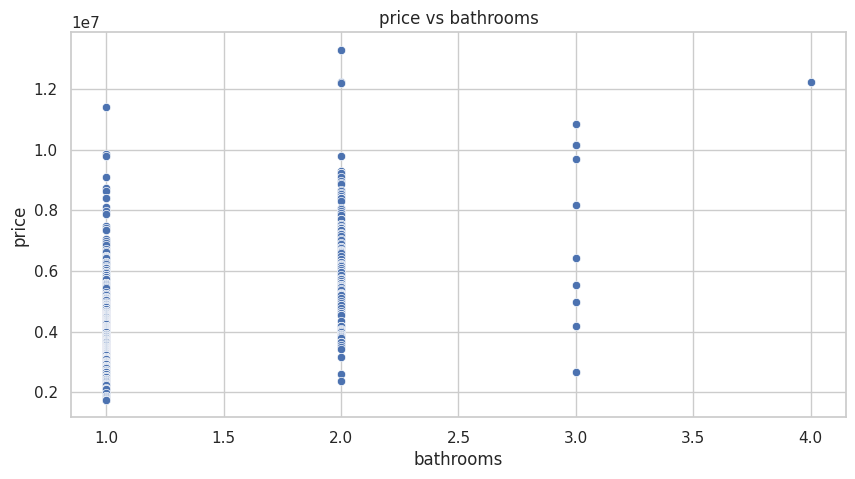

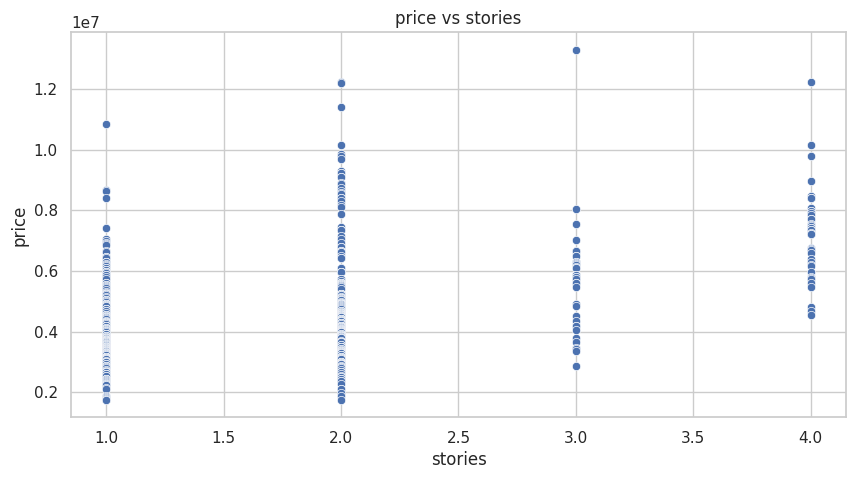

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

# Target histogram
plt.figure()
sns.histplot(df[TARGET], bins=50, kde=True)
plt.title(f'Distribution of {TARGET}')
plt.xlabel(TARGET)
plt.show()

# Safe correlation (numeric only)
numeric_df = df.select_dtypes(include=['number'])
if TARGET not in numeric_df.columns:
    print(f"⚠️ Target '{TARGET}' is not numeric. Converting to numeric (if possible).")
    df[TARGET] = df[TARGET].astype(str).str.replace(r'[^0-9.]','', regex=True)
    df[TARGET] = pd.to_numeric(df[TARGET], errors='coerce')
    numeric_df = df.select_dtypes(include=['number'])

corrs = numeric_df.corr()[TARGET].abs().sort_values(ascending=False)
print("Top correlations with target:")
display(corrs.head(10))

# Scatterplots for top correlated features
top_features = [c for c in corrs.index if c != TARGET][:3]
for f in top_features:
    plt.figure()
    sns.scatterplot(x=df[f], y=df[TARGET])
    plt.title(f'{TARGET} vs {f}')
    plt.xlabel(f)
    plt.ylabel(TARGET)
    plt.show()


In [ ]:


from sklearn.model_selection import train_test_split

# Drop unnecessary columns (like IDs)
drop_like = [TARGET]
drop_like += [c for c in df.columns if 'id' in c.lower() or 'index' in c.lower()]

# One-hot encode categorical columns
df_enc = pd.get_dummies(df, columns=[c for c in cat_cols if c not in drop_like], drop_first=True)

# Final feature list
FEATURES = [c for c in df_enc.columns if c not in drop_like]
print("Number of final features:", len(FEATURES))

X = df_enc[FEATURES].values
y = df_enc[TARGET].values

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train size:", X_train.shape, "Test size:", X_test.shape)


Number of final features: 13
Train size: (436, 13) Test size: (109, 13)


In [ ]:


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

# ✅ Compatible RMSE calculation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("🏡 Linear Regression Performance")
print("RMSE:", round(rmse,3))
print("R²:", round(r2,3))


🏡 Linear Regression Performance
RMSE: 1324506.96
R²: 0.653


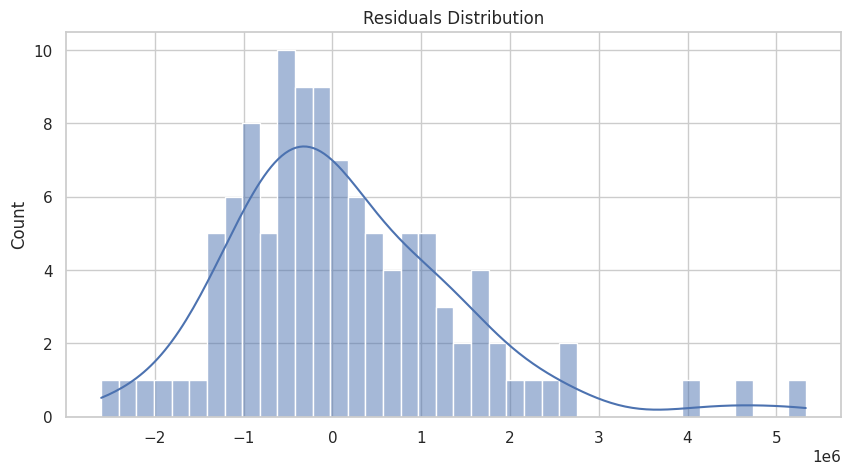

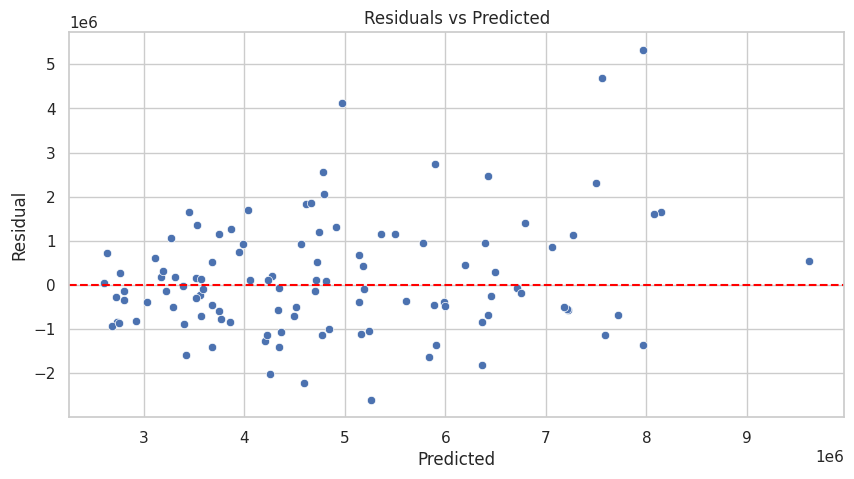

,Feature,Coefficient,|Coef|
2,bathrooms,521879.027748,521879.027748
0,area,519552.416340,519552.416340
9,airconditioning_yes,365157.393851,365157.393851
3,stories,349251.438906,349251.438906
10,prefarea_yes,266656.351993,266656.351993
12,furnishingstatus_unfurnished,-192015.917982,192015.917982
4,parking,192005.953667,192005.953667
7,basement_yes,187067.803214,187067.803214
8,hotwaterheating_yes,149862.702991,149862.702991
5,mainroad_yes,128498.628215,128498.628215


In [ ]:


residuals = y_test - y_pred

plt.figure()
sns.histplot(residuals, bins=40, kde=True)
plt.title("Residuals Distribution")
plt.show()

plt.figure()
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted")
plt.show()

coef_df = pd.DataFrame({'Feature': FEATURES, 'Coefficient': lr.coef_})
coef_df['|Coef|'] = coef_df['Coefficient'].abs()
display(coef_df.sort_values('|Coef|', ascending=False).head(15))


In [ ]:


from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid = GridSearchCV(ridge, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

best_ridge = grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_scaled)

# ✅ Use manual sqrt for RMSE (works in all sklearn versions)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("🏗️ Ridge Regression Results")
print("Best alpha:", grid.best_params_['alpha'])
print("RMSE:", round(rmse_ridge,3))
print("R²:", round(r2_ridge,3))


🏗️ Ridge Regression Results
Best alpha: 10
RMSE: 1326679.134
R²: 0.652


In [ ]:


import joblib
from google.colab import files

joblib.dump(best_ridge, 'ridge_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("✅ Saved ridge_model.pkl and scaler.pkl")
files.download('ridge_model.pkl')
files.download('scaler.pkl')


✅ Saved ridge_model.pkl and scaler.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:


import numpy as np
ridge_loaded = joblib.load('ridge_model.pkl')
scaler_loaded = joblib.load('scaler.pkl')

sample = df_enc[FEATURES].median().values.reshape(1, -1)
sample_scaled = scaler_loaded.transform(sample)
pred = ridge_loaded.predict(sample_scaled)
print("🏠 Predicted price for median sample:", round(pred[0],2))


🏠 Predicted price for median sample: 3861955.53
